# Exploration of advertisements for the sale of apartments

Project based on the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. The goal of the project is to learn how to determine the market value of real estate based on existing data. Eventually this would allow to build an automated system which will track anomalies and fraudulent activity. 

## Examining data from a file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = pd.read_csv('/content/project-3-real-estate-data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


### Conclusion

The table contains 23699 entries. There are gaps in the data, some of them may affect the course and results of the analysis, they will have to be filled in or dropped. Omissions could be caused by various reasons, depending on the type of data in the columns, and may indicate the absence of a given parameter in a row, possibly a value of 0 in categorical data, etc. Further the data will be preprocessed in order to bring it into a form suitable for analysis.

## Data preprocessing

There are quite a lot of missing values ​​in the existing dataset, the ways to fill in which are not obvious. Moreover, gaps are present both in the data entered manually by the authors of the ads, and in the values which are calculated automatically according to the cartographic data. In the second case, there are much more gaps, perhaps this is due to problems with indicating the coordinates of housing, or with the absence of the desired objects (POI) in reasonable proximity.

In order not to introduce distortions, for example by filling in with the average values, it is better to leave these gaps as is, and conduct analysis according to the available data.

In the case of the number of balconies, it is logical to assume that if the user did not specify its value, then this indicates of their absence, therefore, we will fill in the gaps in this column with zeros.

In [3]:
data['balcony'] = data['balcony'].fillna(0)

For gaps in the column of the number of days the ad was placed, we apply the technical replacement of gaps with the value -1. This will allow further conversion of the data type of the column, and combine rows with gaps into a separate category and not consider them when analyzing this parameter.

In [4]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

The number of gaps in the column locality_name and floors_total is not significant. Considering that these parameters are important for further research, and it is not possible to fill in the gaps in these records, we will drop lines with such gaps.

In [5]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

Let's convert data types in some columns:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,-1
1,7,3350000.00,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81
2,10,5196000.00,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558
3,0,64900000.00,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121


Obviously "is_apartment" must be of data type "bool". To convert the type, we need to fill in the missing values. This parameter is not the key to the study, we will assume that NaN most likely means "False".

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

Let's look at the ceiling height data:

In [9]:
data['ceiling_height'].describe()

count   14481.00
mean        2.77
std         1.26
min         1.00
25%         2.51
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Let's try to look for the relationship between the height of the ceilings and the cost or area of the housing, as the most obvious possible factors, potentially related. We will limit the range of ceiling heights to values ​​close to reality, at the same time we will get rid of NaNs in this way:

In [10]:
data_ceiling = data[data['ceiling_height'] >= 2.3]
data_ceiling = data[data['ceiling_height'] <= 5]

In [11]:
data_ceiling['ceiling_height'].corr(data_ceiling['last_price'])

0.3861433524718728

In [12]:
data_ceiling['ceiling_height'].corr(data_ceiling['total_area'])

0.47811518406391834

In both cases, the correlation is less than 0.5, so the dependence is weak, and one cannot rely on data with similar "last_price" and "total_area" parameters to fill gaps in "ceiling_height". We leave the gaps untouched, in the future we will keep this in mind when assessing the influence of the height of the ceilings.

It is not possible to fill in the gaps in the "living_area" and "kitchen_area" columns reliably, because there are no dependencies of this parameter on other available ones, the areas can be distributed in any proportions. We can only determine how many records have gaps in both columns at the same time:

In [13]:
data[data['living_area'].isna() & data['kitchen_area'].isna()]['total_area'].count()

1427

## Calculations and adding results to the table

Add the cost per square meter to the table:

In [14]:
data['price_m2'] = data['last_price'] / data['total_area']

Let's decompose the information about the date of the announcement into the day of the week, month and year of the announcement:

In [15]:
data['day'] = data['first_day_exposition'].dt.weekday

In [16]:
data['month'] = data['first_day_exposition'].dt.month

In [17]:
data['year'] = data['first_day_exposition'].dt.year

Divide the records into categories, depending on the floor on which the housing is located:

In [18]:
def floor_type(data):
    '''The function divides the floor of the apartment into categories: first, last, other'''
    if data['floor'] == 1:
        return 'first'
    if data['floor'] == data['floors_total']:
        return 'last'
    return 'other'

In [19]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [20]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_type
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,-1,120370.37,3,3,2019,other
1,7,3350000.00,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,first
2,10,5196000.00,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,other
3,0,64900000.00,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,408176.10,4,7,2015,other
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.00,133.81,2017-03-21,3,3.70,5,73.30,3,False,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,-1,72490.85,1,3,2017,other
23561,14,3100000.00,59.00,2018-01-15,3,NaN,5,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542.37,0,1,2018,other
23562,18,2500000.00,56.70,2018-02-11,2,NaN,3,29.70,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,-1,44091.71,6,2,2018,first
23563,13,11475000.00,76.75,2017-03-28,2,3.00,17,NaN,12,False,False,False,23.30,2,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602,149511.40,1,3,2017,other


Calculate the ratio of living area and kitchen area to the total area of the apartment, add the appropriate columns to the table. Because there are gaps in the data on the area of the kitchen and living area, we will indicate the values of the ratios for these rows as 0.

In [21]:
def living_total_ratio(data):
    '''The function calculates the ratio of living and total area'''
    if pd.isna(data['living_area']) == False:
        living_total_ratio = data['living_area'] / data['total_area'] 
    else:
        living_total_ratio = 0
    return living_total_ratio

In [22]:
data['living_total_ratio'] = data.apply(living_total_ratio, axis=1)

In [23]:
def kitchen_total_ratio(data):
    '''The function calculates the ratio of the kitchen area and the total area'''
    if pd.isna(data['kitchen_area']) == False:
        living_total_ratio = data['kitchen_area'] / data['total_area'] 
    else:
        living_total_ratio = 0
    return living_total_ratio

In [24]:
data['kitchen_total_ratio'] = data.apply(kitchen_total_ratio, axis=1)

Final table:

In [25]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_type,living_total_ratio,kitchen_total_ratio
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,-1,120370.37,3,3,2019,other,0.47,0.23
1,7,3350000.00,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,first,0.46,0.27
2,10,5196000.00,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,other,0.61,0.15
3,0,64900000.00,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,408176.10,4,7,2015,other,0.00,0.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,other,0.32,0.41


## Exploratory data analysis

### Exploring the parameters of the total area, sale price, number of rooms and ceiling heights

In [26]:
data['total_area'].describe()

count   23565.00
mean       60.32
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

In [27]:
data.loc[data['total_area'] > 300]['total_area'].count()

61

There are not many objects with an area of ​​more than 300 sq.m., we will not display them on a histogram so that it is clearer. At the same time, such objects are quite real and are not considered outliers.

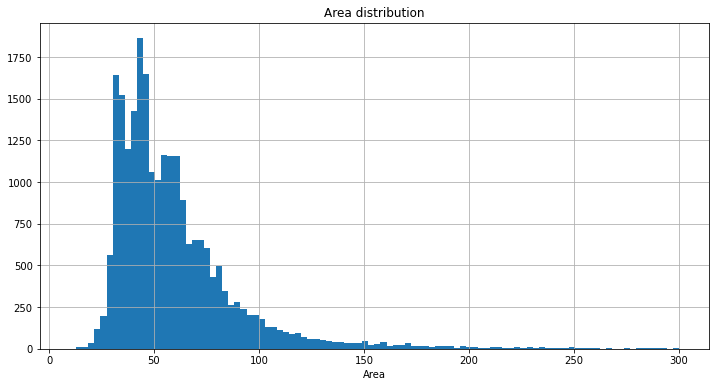

In [28]:
plt.xlabel('Area')
plt.title('Area distribution')
data['total_area'].hist(
    bins=100, range=(10,300), figsize=(12,6))

The distribution shows that the most frequently sold apartments are small ones.

In [29]:
data['last_price'].describe()

count       23565.00
mean      6540058.26
std      10910934.72
min         12190.00
25%       3400000.00
50%       4646000.00
75%       6790000.00
max     763000000.00
Name: last_price, dtype: float64

In [30]:
data[data['last_price'] > 35000000]['last_price'].count()

246

In [31]:
data[data['last_price'] < 1000000]['last_price'].count()

225

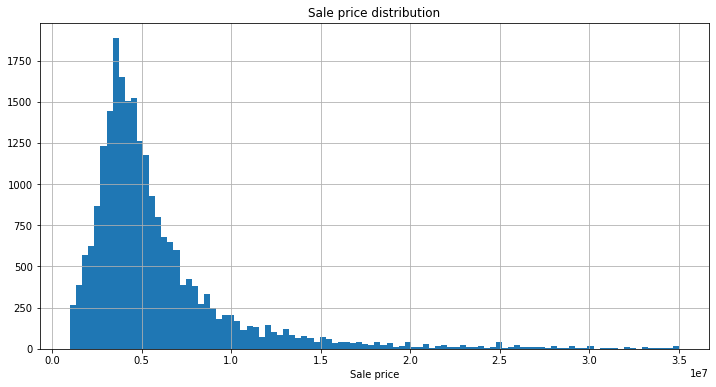

In [32]:
plt.xlabel('Sale price')
plt.title('Sale price distribution')
data['last_price'].hist(bins=100, range=(1000000, 35000000), figsize=(12, 6))

As in the previous case, the data shows that affordable housing dominates the market, which is true.

In [33]:
data['rooms'].describe()

count   23565.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [34]:
data.query('rooms == 0').pivot_table(index='rooms', values=['open_plan', 'studio'], aggfunc=['sum', 'count'])

sum            count       
      open_plan studio open_plan studio
rooms                                  
0            59    135       194    194

0 rooms is not a mistake, but a free layout or studio.

In [35]:
data[data['rooms'] >= 5]['rooms'].count()

519

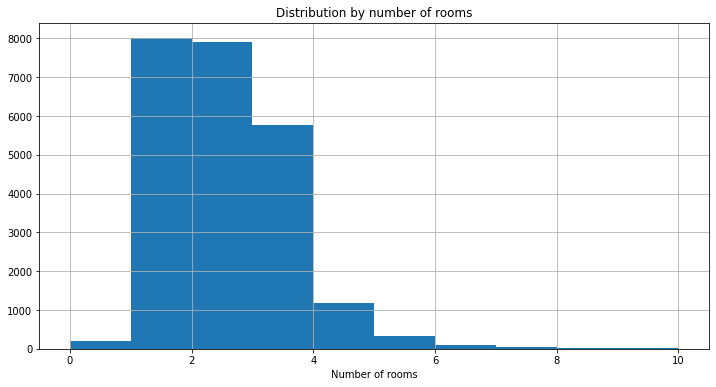

In [36]:
plt.xlabel('Number of rooms')
plt.title('Distribution by number of rooms')
data['rooms'].hist(bins=10, range=(0,10), figsize=(12, 6))

Most popular on market are apartments with one and two rooms, lesser extent three-room. Multi-room apartments and studios are sold much less frequently.

In [37]:
data['ceiling_height'].describe()

count   14481.00
mean        2.77
std         1.26
min         1.00
25%         2.51
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

Ceiling heights have clear spikes on both sides. In accordance with codes, the minimum ceiling height in a residential area should be at least 2.5 meters and not more than 3 meters. Since housing could have been built before the introduction of these rules, we will limit the minimum ceiling height to a level of 2.3 meters. We will limit the maximum height to 5 meters, as it is quite possible for elite apartments.

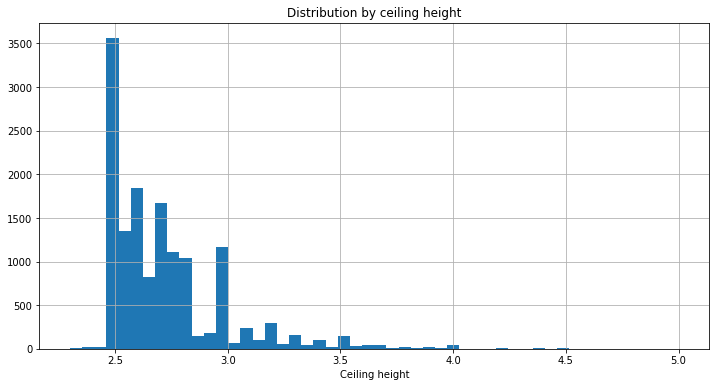

In [38]:
plt.xlabel('Ceiling height')
plt.title('Distribution by ceiling height')
data['ceiling_height'].hist(bins=50, range=(2.3,5), figsize=(12, 6))

The vast majority of apartments comply with codes in terms of ceiling height.

### Exploration of the apartment sale time

The apartment sale time is stored in the "days_exposition" column and is the number of days from publication to removal of the announcement.

In [39]:
data[data['days_exposition'] != -1]['days_exposition'].describe()

count   20394.00
mean      180.74
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

This value is not present for all records, we will not consider them.

Average time to sell is 180 days, median is 95.

The maximum sale time is much higher than the value of the third quartile. Let's discard some of the maximum values at the level of ~5% of the total number of records. Let's define the maximum number of days that we will consider.

Let's look at the distribution of sales over time on the histogram:

In [40]:
len(data.query('days_exposition > 600')) / len(data)

0.05062592828347125

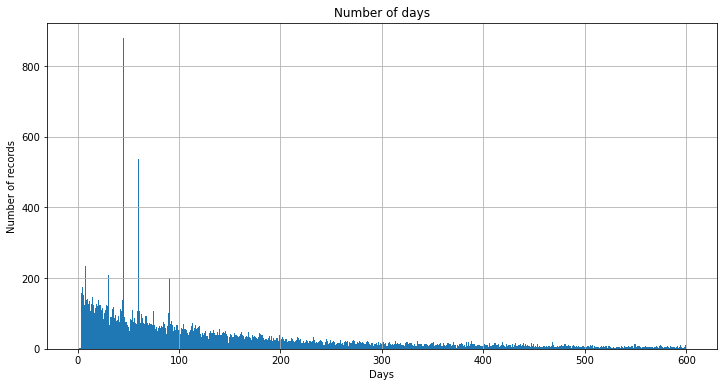

In [41]:
plt.xlabel('Days')
plt.ylabel('Number of records')
plt.title('Number of days')
data[data['days_exposition'] != -1]['days_exposition'].hist(bins=600, range=(0, 600), figsize=(12, 6))

In [42]:
data['days_exposition'].value_counts().head(10)

-1     3171
 45     879
 60     538
 7      234
 30     208
 90     200
 4      174
 3      157
 5      152
 14     147
Name: days_exposition, dtype: int64

Two outstanding peaks were found - 45 and 60 days. Otherwise, the histogram shows nothing out of the ordinary.

Let's look at the distribution of peak sales depending on the number of rooms and the cost of the apartment:

In [43]:
data.query('days_exposition == 60 | days_exposition == 45').pivot_table(
    index='rooms', values='last_price', aggfunc=['count', 'median', 'mean'])

,count,median,mean
,last_price,last_price,last_price
rooms,,,
0,15,2730000.00,2896593.33
1,556,3450000.00,3514832.32
2,516,4200000.00,4343459.33
3,287,5250000.00,5320525.11
4,39,6300000.00,9118846.15
5,3,8000000.00,9266666.67
6,1,9000000.00,9000000.00


The results are consistent with previous findings on the number of rooms and the cost of top-selling apartments. Thus, it can be concluded that these peak values are not outliers.

In general, most apartments are sold within 100 days.

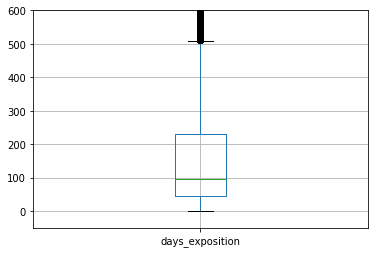

In [44]:
plt.ylim(-50,600)
data[data['days_exposition'] != -1].boxplot(column='days_exposition', figsize=(6,12))

Too fast can be considered sales faster than Q1 = 45 days, and too long - more than Q3 = 231 days.

### What factors most affect the value of an apartment?

#### Apartment area

Let's build a scatter plot of the dependence of the price on the area of ​​the apartment

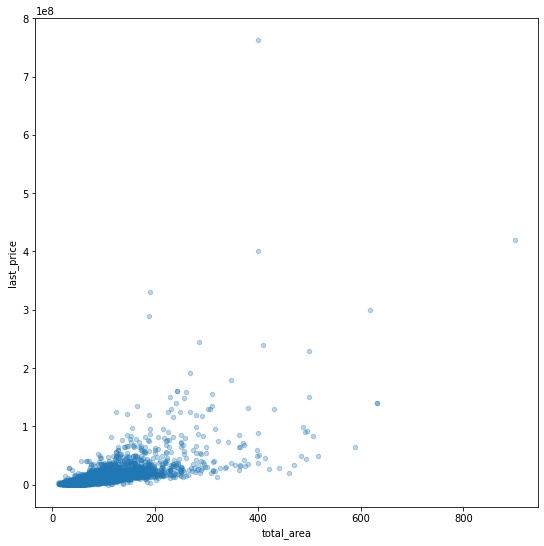

In [45]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(9,9))

Outliers are visible, which interfere with the reading of the graph and will affect the calculated correlation value.

To exclude this influence, we limit the ranges of the considered values and calculate the correlation coefficient:

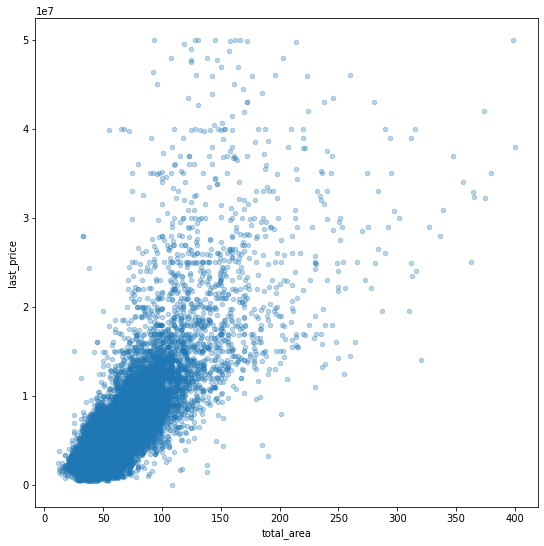

In [46]:
data.query('last_price <= 50000000 & total_area <= 400').plot(
    x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(9,9))

In [47]:
data.query('1000000 <= last_price <= 50000000 & total_area <= 400')['last_price'].corr(data['total_area'])

0.781543016898459

The correlation coefficient value of 0.78 indicates a significant linear relationship between the "total_area" and "last_price" parameters.

#### Number of rooms

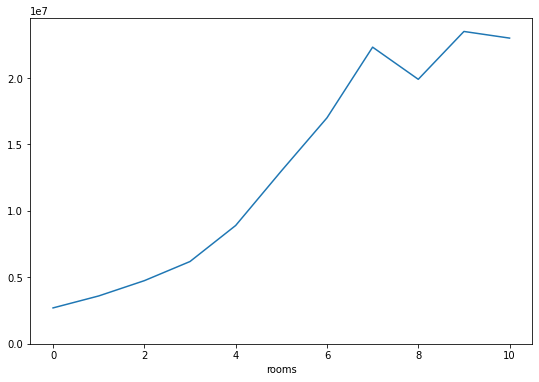

In [48]:
data.query('last_price <= 50000000 & rooms <= 10').groupby('rooms')['last_price'].median().plot(ylim=0, figsize=(9,6))

We see that the more rooms, the higher the price.

#### Floor

In [49]:
data.pivot_table(
    index='floor_type', values='last_price', aggfunc=['mean', 'median']).sort_values(by=('median','last_price'))

,mean,median
,last_price,last_price
floor_type,,
first,4802603.99,3900000.00
last,7359137.80,4300000.00
other,6674348.90,4848500.00


The first and last floors are the cheapest, the demand for them is lower due to less comfort of living due to external factors.

#### Distance from the city center

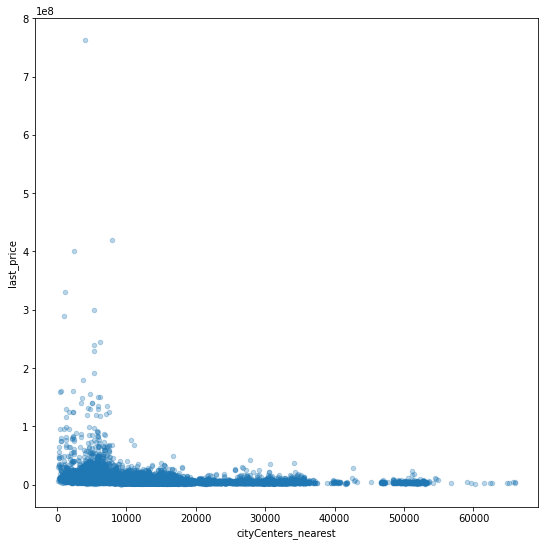

In [50]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize=(9,9))

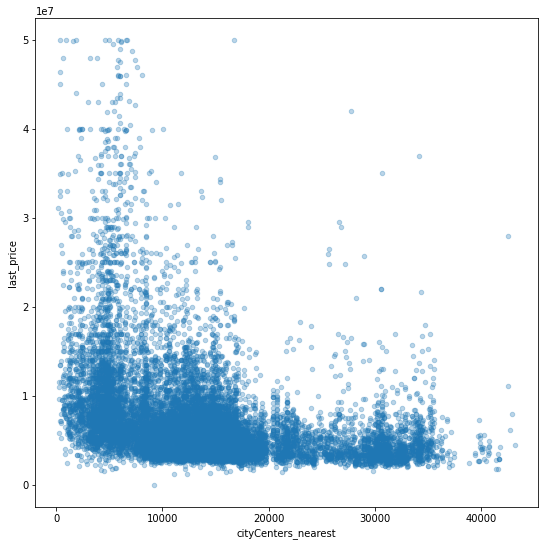

In [51]:
data.query('last_price <= 50000000 & cityCenters_nearest <= 45000').plot(
    x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3, figsize=(9,9))

According to the graph, the dependence can be traced, the closer to the center, the more expensive apartments, but other factors also influence this, for example, the area and number of rooms, the category and age of housing, etc.

### Top 10 settlements by number of ads

Let's define 10 settlements with the largest number of ads, calculate the average cost per square meter in them, sort them in descending order of the average cost per square meter:

In [52]:
top_10_locations = data.groupby('locality_name')['price_m2'].count().sort_values(ascending=False).head(10)

In [53]:
top_10_locations

locality_name
Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: price_m2, dtype: int64

In [54]:
data.query('locality_name in @top_10_locations.index').pivot_table(
    index='locality_name', values='price_m2').sort_values(by='price_m2', ascending=False)

,price_m2
locality_name,
Санкт-Петербург,114868.88
Пушкин,103125.82
деревня Кудрово,92473.55
посёлок Парголово,90175.91
посёлок Мурино,85673.26
посёлок Шушары,78551.34
Колпино,75424.58
Гатчина,68746.15
Всеволожск,68654.47


The highest cost per square meter of housing among 10 settlements with the maximum number of ads in St. Petersburg - almost 115 thousand rubles, the lowest - in Vyborg, a little over 58 thousand.

### We find out which area is considered the center of the city

Let's save the announcement for the city of St. Petersburg in a separate dataframe, discard the gaps in the "cityCenters_nearest" column, and create a column in it with the distance to the city center in kilometers:

In [55]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [56]:
data_spb = data_spb.dropna(subset=['cityCenters_nearest']).reset_index(drop=True)

In [57]:
data_spb['km_to_center'] = data_spb['cityCenters_nearest'] / 1000
data_spb['km_to_center'] = data_spb['km_to_center'].astype('int')

In [58]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_type,living_total_ratio,kitchen_total_ratio,km_to_center
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,-1,120370.37,3,3,2019,other,0.47,0.23,16
1,10,5196000.00,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,other,0.61,0.15,13
2,0,64900000.00,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424,408176.10,4,7,2015,other,0.00,0.00,6
3,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,other,0.32,0.41,8
4,5,7915000.00,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,-1,110544.69,3,4,2019,other,0.00,0.26,11


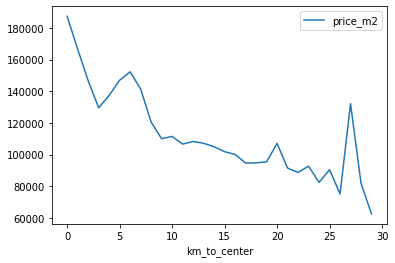

In [59]:
data_spb.pivot_table(index='km_to_center', values='price_m2').plot()

Distance from the center begins to noticeably affect the cost per square meter of housing at a distance of more than three kilometers.

### Let's analyze apartments in the center

In [60]:
data_spb_center = data_spb.query('km_to_center <= 3').reset_index(drop=True)

In [61]:
data_spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day,month,year,floor_type,living_total_ratio,kitchen_total_ratio,km_to_center
0,8,6500000.00,97.20,2015-10-31,2,NaN,3,46.50,1,False,False,False,19.60,0,Санкт-Петербург,20052.00,2336.00,3.00,411.00,3.00,124.00,265,66872.43,5,10,2015,first,0.48,0.20,2
1,6,15500000.00,149.00,2017-06-26,5,NaN,5,104.00,4,False,False,False,17.00,0,Санкт-Петербург,23670.00,3502.00,0.00,NaN,1.00,779.00,644,104026.85,0,6,2017,other,0.70,0.11,3
2,32,9600000.00,90.00,2017-09-26,4,NaN,5,67.00,2,False,False,False,8.00,0,Санкт-Петербург,23277.00,2818.00,0.00,NaN,0.00,NaN,104,106666.67,1,9,2017,other,0.74,0.09,2
3,16,6500000.00,51.80,2018-08-01,2,3.45,6,25.60,2,False,False,False,7.30,1,Санкт-Петербург,20502.00,3618.00,2.00,533.00,1.00,812.00,163,125482.63,2,8,2018,other,0.49,0.14,3
4,8,4800000.00,40.00,2017-11-18,2,NaN,3,29.00,2,False,False,False,6.00,0,Санкт-Петербург,23371.00,2913.00,0.00,NaN,2.00,729.00,80,120000.00,5,11,2017,other,0.72,0.15,2


#### Exploring the parameters of the total area, sale price, number of rooms and ceiling heights of apartments in the city center

In [62]:
data_spb_center['total_area'].describe()

count   1157.00
mean      97.39
std       55.79
min       12.00
25%       62.00
50%       84.10
75%      115.20
max      517.00
Name: total_area, dtype: float64

In [63]:
data_spb_center.loc[data['total_area'] > 300]['total_area'].count()

7

There are not many objects with an area of ​​more than 300 sq.m., we will not display them on a histogram so that it is clearer. At the same time, such objects are quite real and are not considered outliers.

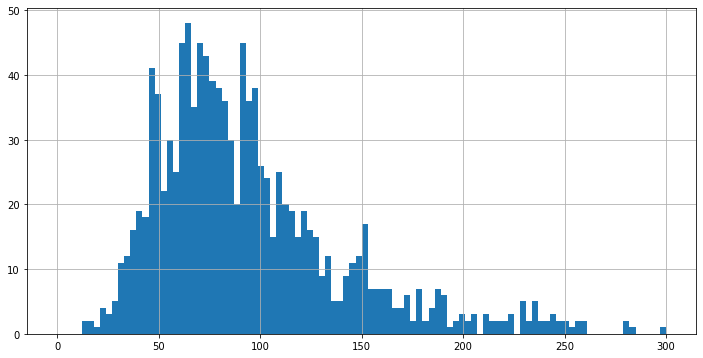

In [64]:
data_spb_center['total_area'].hist(bins=100, range=(0,300), figsize=(12,6))

The distribution shows that the most frequently sold apartments in the city center are apartments from 40 to 100 square meters, that is, there is a shift in the area of apartments for sale in the center relative to the entire city to a larger side.

In [65]:
data_spb_center['last_price'].describe()

count        1157.00
mean     16034281.48
std      32948225.45
min       2100000.00
25%       7000000.00
50%       9500000.00
75%      14490000.00
max     763000000.00
Name: last_price, dtype: float64

In [66]:
data_spb_center[data_spb_center['last_price'] > 60000000]['last_price'].count()

41

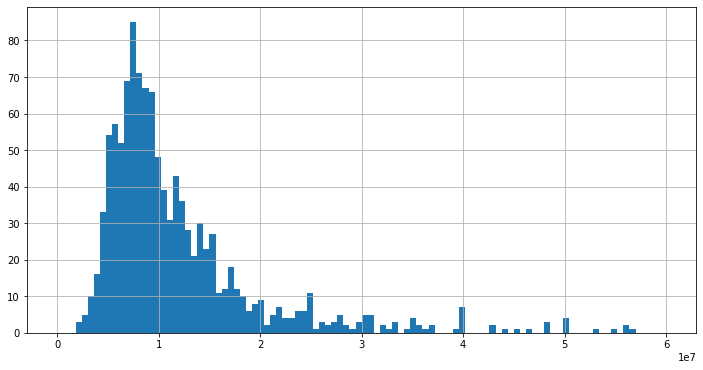

In [67]:
data_spb_center['last_price'].hist(bins=100, range=(0, 60000000), figsize=(12, 6))

As in the previous case, data from the central area show that low-cost housing dominates the market, but low-cost housing relative to the center is significantly more expensive than in the region as a whole.

In [68]:
data_spb_center['rooms'].describe()

count   1157.00
mean       3.10
std        1.56
min        0.00
25%        2.00
50%        3.00
75%        4.00
max       19.00
Name: rooms, dtype: float64

In [69]:
data_spb_center[data_spb_center['rooms'] >= 10]['rooms'].count()

4

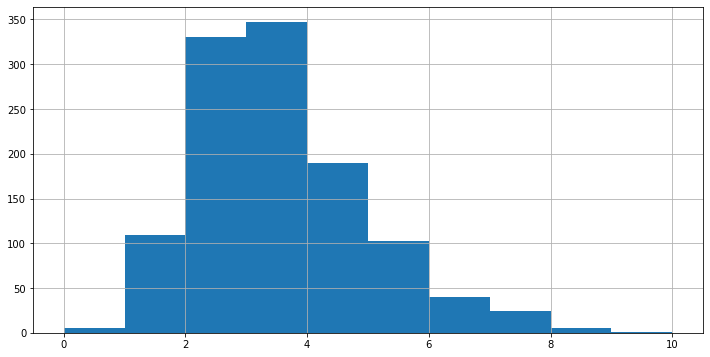

In [70]:
data_spb_center['rooms'].hist(bins=10, range=(0,10), figsize=(12, 6))

Most apartments have 2-3 rooms, 4-room apartments are almost half the size, one-room and five-room apartments are equally popular. There is a significant difference from values across the region.

In [71]:
data_spb_center['ceiling_height'].describe()

count   795.00
mean      3.26
std       1.38
min       2.45
25%       3.00
50%       3.17
75%       3.40
max      32.00
Name: ceiling_height, dtype: float64

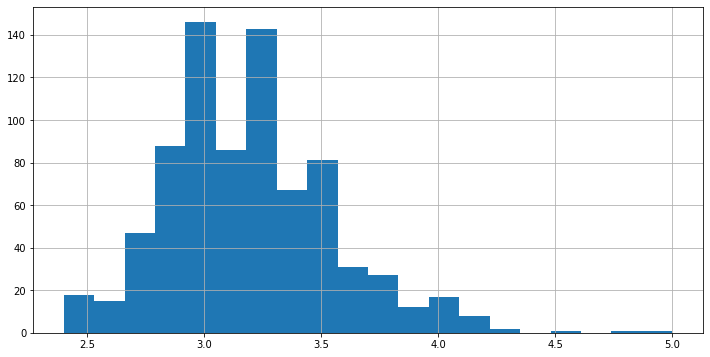

In [72]:
data_spb_center['ceiling_height'].hist(bins=20, range=(2.4, 5), figsize=(12, 6))

The height of the ceilings in the center is generally higher than the average for the region.

### What factors affect the cost of apartments in the center

#### Number of apartment rooms in the center

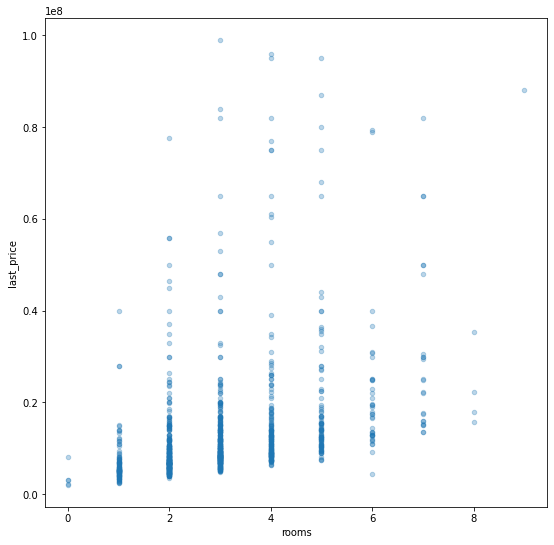

In [73]:
data_spb_center.query('last_price <= 100000000 & rooms <= 10').plot(
    x='rooms', y='last_price', kind='scatter', alpha=0.3, figsize=(9,9))

The graph shows that the relationship between the considered parameters for the center is not significant, as in the case of the mutual influence of these parameters in the entire sample.

#### Floor of apartments in the center

In [74]:
data_spb_center.pivot_table(
    index='floor_type', values='last_price', aggfunc=['mean', 'median']).sort_values(by=('median','last_price'))

,mean,median
,last_price,last_price
floor_type,,
first,9586389.63,7125000.00
last,19109971.62,9400000.00
other,16355894.33,10000000.00


The first and last floors are the cheapest, as in the whole region.

As a result of the analysis of data for the center of St. Petersburg, we can conclude that, despite the high cost, area, and height of ceilings, the dependences of the distribution of these values correspond to their distributions in the general sample.

We collect a summary table of key parameters for the entire region and for the center in order to add it to the general output.

In [75]:
region_summary = pd.DataFrame(data[[
    'last_price', 'price_m2', 'total_area','rooms', 'ceiling_height' ]].median())
spb_center_summary = pd.DataFrame(data_spb_center[[
    'last_price', 'price_m2', 'total_area','rooms', 'ceiling_height' ]].median())
total_summary = region_summary.join(spb_center_summary, lsuffix='Общий', rsuffix='Центр').reset_index()
total_summary.columns = ['Parameter', 'In region', 'In center']

## Final conclusion

A study was made of the distribution of parameters in advertisements for the sale of apartments over the past few years, as well as the impact of these parameters on the cost of housing in St. Petersburg and its region, a comparison of sales of the segment of apartments in the city center with all settlements. The data was loaded and preprocessed, additional parameters were calculated in accordance with the requirements of the task. Answers to the questions posed were received and conclusions were formulated regarding each subsection of the study:
* often sold are apartments of small area and from the lower price range, because these two characteristics are closely interconnected, which is confirmed by calculations
* in general, sales of one and two-room apartments with a standard ceiling height prevail, but in the city center the bulk of sales are 2-3 room apartments with an increased ceiling height
* in most cases, the term for the sale of an apartment reaches one hundred days, often - 45 and 60 days
* the first and last floors are cheapest
* the closer to the center, the more expensive apartments, but other factors also influence this
* of the 10 settlements with the maximum number of ads, St. Petersburg is the leader in terms of the average cost per square meter, with almost 115 thousand rubles, and Vyborg closes the top ten, with a price slightly higher than 58 thousand
* distance from the center begins to noticeably affect the cost per square meter of housing outside a circle with a radius of about three kilometers

In [76]:
total_summary

,Parameter,In region,In center
0,last_price,4646000.00,9500000.00
1,price_m2,95000.00,116150.00
2,total_area,52.00,84.10
3,rooms,2.00,3.00
4,ceiling_height,2.65,3.17
